# The Ising model

## Goal: 
Implementing computational simulation of one dimension Ising model

### history 
This model was suggested to Ising by his thesis adviser, Lenz. Ising
solved the one-dimensional model, ..., and on the basis of the fact
that the one-dimensional model had no phase transition, he asserted
that there was no phase transition in any dimension. As we shall
see, this is false. It is ironic that on the basis of an elementary
calculation and erroneous conclusion, Ising’s name has become among
the most commonly mentioned in the theoretical physics literature.
But history has had its revenge. Ising’s name, which is correctly
pronounced “E-zing,” is almost universally mispronounced “I-zing.”

Barry Simon

                                                                 

#### For revising the theoritical concept of ising model including derivation and all other aspects, I recommend going through "Statistical Mechanics 3rd Edition" section 13.2 

In [1]:
import numpy
import matplotlib.pyplot as plt

## The following package is required to update the plot within the same figure
## this allows us to save time editing plot without the need to re-run code
from IPython.display import clear_output

To update our two plots during the simulation we have in this notebook we use  the function *live_plot* in the following cell.
it allows us to do this through updating the plot in a sequence.

In [5]:
def live_plot(data_2D, data_1D):
    """
      Clear the figure and update the plots with newly created data
      
        :params:  - data_2D --> 2D numpy array
                  - data_1D --> Two 1D numpy arrays containing the x and y axis of the plotted data
    """
    clear_output(wait=True)
    
    ## we initialize the figure with corresponding subplots
    fig = plt.figure(figsize = (22, 10))
    ax1 = fig.add_subplot(1, 2, 1)
    ax2 = fig.add_subplot(1, 2, 2)
    
    ## we plot direct visualization of the spin states in the system
    ax1.imshow(data_2D, interpolation = "none", vmin = -1., vmax = 1., cmap = "hot")

    ## we plot magnetization as a function of time. where time here corresponds to simulation steps
    ax2.plot(data_1D[:, 0], data_1D[:, 1])
    ax2.set_xlim(0, Steps)
    ax2.set_ylim(-1.1, 1.1)
    
    ax2.set_xlabel("Simulation step", fontsize = 20)
    ax2.set_ylabel("<M>", fontsize = 20)
    
    plt.show();

Let start with defining system parameters by defining the number of particles in our system *N_* and the number of Steps_ the simulation is executed over.

The thermal energy *k_BT* and the external magnetic field B_ are expressed in terms of the nearest neighbour exchange energy *J*.

In [10]:
N_ = 100
Steps_ = 300000

B_ = -1.0          # [J]
k_BT = 2.3        # [J]

## Calculate the energy change due to one spin flip
def deltaE(S, i, j):
    Sij  = S[i, j]
    Enow = -Sij * (S[(i+1)%N_, j] + S[(i-1)%N_, j] + S[i, (j+1)%N_] + S[i, (j-1)%N_] + float(B_)) ## Use periodic boundary conditions
    return -2 * Enow

Now we initialize the system by randomly defining the spins. We do this by generating a two by two array with values between 0 and 1. All values below 0.5 correspond to spin down,  -1 and all values above 0.5 correspond to spin up, +1.

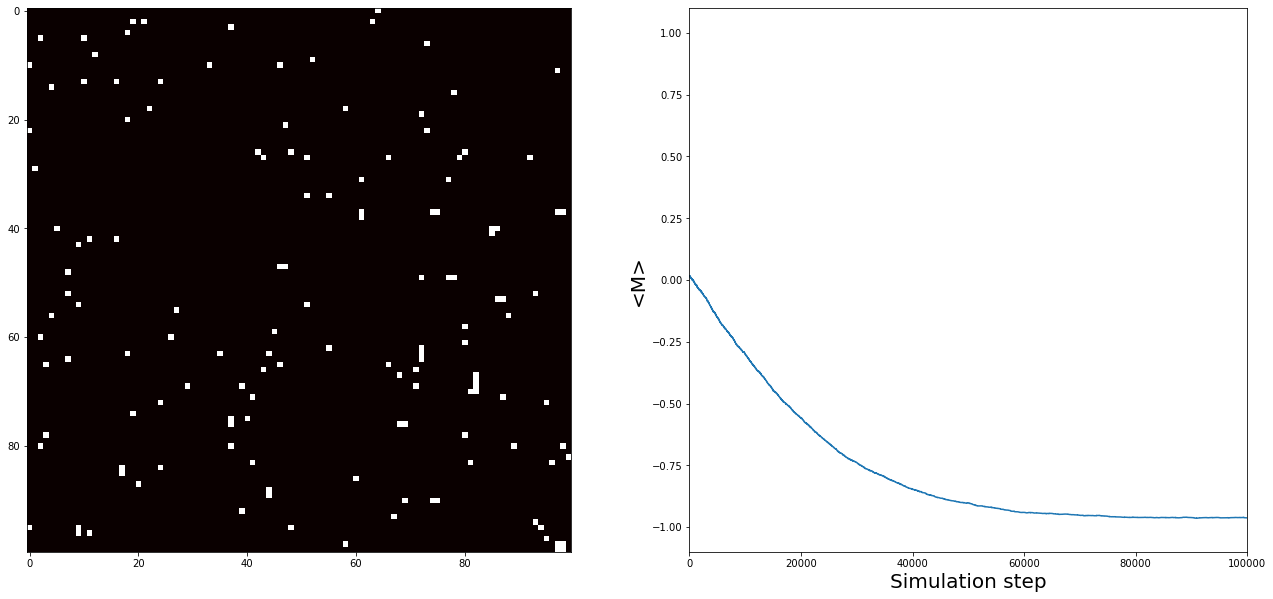

In [11]:
## Initially, we assign the spins randomly 
spins = numpy.where(numpy.random.random((N_, N_)) > 0.5, 1, -1)

## Determine the magnitization and store in numpy array with shape:
M = numpy.zeros((Steps_, 2))
M[0] = 0, numpy.array([numpy.mean(spins)])


## Now we define what every simulation step will do
for idx in range(Steps_):
    ## Select a random value for i and j
    i, j = numpy.random.randint(0, N_, 2)
    ## For the selected indices i and j determine the change in energy
    dE = deltaE(spins, i, j)
    
    ## If the change in energy is smaller than 0, or a random number is smaller 
    ## than the corresponding thermal fluctuations, allow the spin change/flip
    if (dE < 0.0) or (numpy.random.random() < numpy.exp(-dE / float(k_BT))):
        spins[i, j] = -spins[i, j]

    ## Determine the magnetization of the system and store into the 
    M[idx] = idx, numpy.mean(spins)
    
    ## For every 999th step, update the plots
    if idx %(999) == 0:       
        live_plot(spins, M[:idx])
